<a href="https://colab.research.google.com/github/arunt-sjsu/ML_Assignments/blob/main/Assignment2/Assignment2_GMM_and_Hierarchical_CA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this colab is to study kmeans, GMM and Hierarchical Clustering and compare the different clusters formed. The first step is to import the data. To do this, please upload the file from below location:
https://drive.google.com/file/d/1KS7URSB59wECwZFxDshHs4CWUVObMzdj/view?usp=sharing
To the folder on the right. Now you should be able to run the example.


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, mixture
from matplotlib.colors import LogNorm


Load the dataset


In [36]:
X=pd.read_csv('/content/train_set.csv')
X=X.sample(n=10000, random_state=1)
X.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.088128,0.037246,0.055215,-0.013445,-0.032255,-0.041464,0.041024,-0.041193,-0.001922,0.018382,0.002301,-0.009627,50.693400
std,0.985335,1.019638,0.986480,1.004042,0.997828,1.000522,0.986763,1.001130,0.988537,1.018465,1.007223,0.996984,22.762658
min,-3.457446,-1.266152,-1.653727,-1.642061,-1.222438,-3.309186,-3.045733,-3.306263,-2.622748,-1.831438,-2.062317,-2.018180,4.000000
25%,-0.326738,-1.038727,-0.747205,-0.950525,-0.957032,-0.361620,-0.725891,-0.358811,-0.649180,-0.771027,-0.762013,-0.725966,30.000000
50%,0.359305,-0.135758,0.293175,-0.109211,-0.151495,-0.237566,0.274412,-0.245697,0.076762,-0.052494,0.021455,0.009475,56.000000
75%,0.688390,0.779760,0.397830,0.839415,0.812783,0.468899,1.013975,0.486918,0.681538,0.783108,0.791956,0.723541,68.000000
max,2.626545,2.296120,2.273423,1.768394,2.024124,3.014266,1.060168,2.914173,2.894736,2.427720,2.297991,2.559118,81.000000


Cluster Analysis using Kmeans

Cluster Labels:[2 0 1 ... 1 0 0]
Cluster Centers:[[-0.94876046 -0.17310573]
 [ 1.20377427  0.04376473]
 [-0.23907773  1.42733906]
 [-0.0037264  -1.66663327]]


<Figure size 720x504 with 0 Axes>

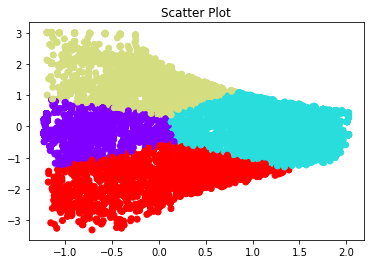

<Figure size 720x504 with 0 Axes>

In [37]:
kmeans = cluster.KMeans(n_clusters=4, random_state=0).fit(X[["motor_speed","torque"]])
print("Cluster Labels:"+ str(kmeans.labels_))
print("Cluster Centers:"+ str(kmeans.cluster_centers_))

plt.title("Scatter Plot")
plt.scatter(X[["motor_speed"]],X[["torque"]], c=kmeans.labels_, cmap='rainbow')
plt.figure(figsize=(10, 7))

Cluster Analysis using Hierarchical Clustering

<Figure size 720x504 with 0 Axes>

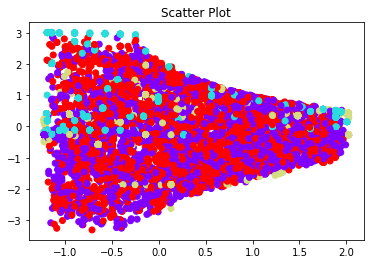

<Figure size 720x504 with 0 Axes>

In [45]:
hier_model = cluster.AgglomerativeClustering(n_clusters=4,linkage="average", affinity="euclidean")
hier_model.fit(X)

plt.title("Scatter Plot")
plt.scatter(X[["motor_speed"]],X[["torque"]], c=hier_model.labels_, cmap='rainbow')
plt.figure(figsize=(10, 7))

Cluster Analysis Using Birch 

Cluster Labels:[3 1 3 ... 1 1 1]


<Figure size 720x504 with 0 Axes>

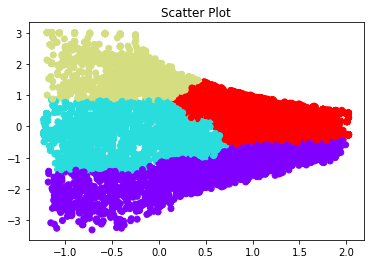

<Figure size 720x504 with 0 Axes>

In [38]:
birch = cluster.Birch(n_clusters=4).fit(X[["motor_speed","torque"]])
print("Cluster Labels:"+ str(birch.labels_))

plt.title("Scatter Plot")
plt.scatter(X[["motor_speed"]],X[["torque"]], c=birch.labels_, cmap='rainbow')
plt.figure(figsize=(10, 7))

Gaussian Mixed Model

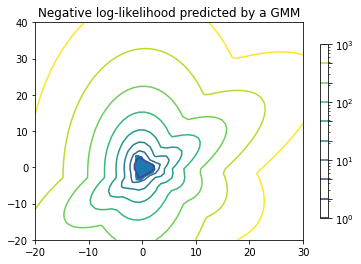

In [40]:
gmm = mixture.GaussianMixture(n_components=4, covariance_type='full').fit(X[["motor_speed","torque"]])
gmm_labels = gmm.predict(X[["motor_speed","torque"]])
# display predicted scores by the model as a contour plot
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X1, Y = np.meshgrid(x, y)
XX = np.array([X1.ravel(), Y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(X1.shape)

CS = plt.contour(X1, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X[["motor_speed"]],X[["torque"]], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

Evaluating the metrics against each other

In [47]:
from sklearn import metrics
print("Silhouette Score For Kmeans")
print(metrics.silhouette_score(X, kmeans.labels_, metric='euclidean'))
print("Silhouette Score For Birch")
print(metrics.silhouette_score(X, birch.labels_, metric='euclidean'))
print("Silhouette Score For GMM")
print(metrics.silhouette_score(X, gmm_labels, metric='euclidean'))
print("Silhouette Score For Hierarchical Model")
print(metrics.silhouette_score(X, hier_model.labels_, metric='euclidean'))

print("Adj Rand Score For Kmeans vs Birch")
print(metrics.adjusted_rand_score(kmeans.labels_, birch.labels_))
print("Adj Rand Score For Kmeans vs GMM")
print(metrics.adjusted_rand_score(kmeans.labels_, gmm_labels))
print("Adj Rand Score For Kmeans vs Hierarchical Model")
print(metrics.adjusted_rand_score(kmeans.labels_, hier_model.labels_))

Silhouette Score For Kmeans
-0.15124213849843954
Silhouette Score For Birch
-0.1525323039298416
Silhouette Score For GMM
-0.10177223441715519
Silhouette Score For Hierarchical Model
0.5646136232918174
Adj Rand Score For Kmeans vs Birch
0.6542313797673731
Adj Rand Score For Kmeans vs GMM
0.41067619097719266
Adj Rand Score For Kmeans vs Hierarchical Model
0.03520046253598517
